选取“BTC-USDT”作为交易的虚拟货币

            下周期策略涨跌幅            净值
time                              
2021-01-01 -0.355970  6.440301e-01
2021-01-02  0.106195  7.124232e-01
2021-01-03 -0.207555  5.645563e-01
2021-01-04 -0.221990  4.392304e-01
2021-01-05 -0.417423  2.558856e-01
2021-01-06 -0.449992  1.407392e-01
2021-01-07  0.044405  1.469887e-01
2021-01-08  0.614980  2.373839e-01
2021-01-09  0.320300  3.134179e-01
2021-01-10  0.025092  3.212822e-01
2021-01-11 -0.099580  2.892890e-01
2021-01-12  0.168667  3.380825e-01
2021-01-13  0.187527  4.014821e-01
2021-01-14 -0.417779  2.337514e-01
2021-01-15  0.230394  2.876062e-01
2021-01-16 -0.382824  1.775036e-01
2021-01-17 -0.051634  1.683384e-01
2021-01-18 -0.202302  1.342832e-01
2021-01-19 -0.314165  9.209618e-02
2021-01-20 -0.252955  6.879996e-02
2021-01-21 -0.004622  6.848200e-02
2021-01-22  0.235329  8.459778e-02
2021-01-23  0.271892  1.075992e-01
2021-01-24 -0.221368  8.378027e-02
2021-01-25  0.041813  8.728334e-02
2021-01-26  0.222049  1.066645e-01
2021-01-27 -1.515925

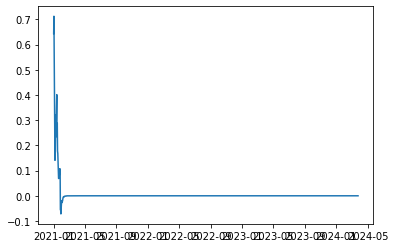

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('expand_frame_repr', False)  # 当列太多时不换行
pd.set_option('display.max_rows', 5000)  # 最多显示数据的行数

# 回测时间
start_date = '2021-01-01'
end_date = '2024-03-25'
symbol = 'BTC-USDT'

# 回测参数
select_coin_num = 1  # 单边选币数量
leverage = 0.5  # 杠杆比例
period = '24H'  # 周期
c_rate = 2.5 / 10000  # 手续费

# 导入数据
df = pd.read_csv(f'all_coin_factor_data_{period}.csv', encoding='gbk', parse_dates=['time'])
df[df['symbol'] == symbol]
df = df[['time', 'symbol', '下周期币种涨跌幅', 'close']]

# 筛选日期范围
df = df[df['time'] >= pd.to_datetime(start_date)]
df = df[df['time'] <= pd.to_datetime(end_date)]

# 动量
df['Momentum_20D'] = df['close'].pct_change(periods=20)
# 定义买入卖出信号
df['Signal'] = 0  # 初始化信号列
df.loc[df['Momentum_20D'] > 0, 'Signal'] = 1  # 当20天动量为正时买入
df.loc[df['Momentum_20D'] < 0, 'Signal'] = -1  # 当20天动量为负时卖出
# 可以通过计算Signal列的变化来生成实际的交易信号
df['Trade_Signal'] = df['Signal'].diff()

# 计算下周期收益
df['下周期交易涨跌幅'] = df['下周期币种涨跌幅'] * df['Trade_Signal'] * leverage - leverage * c_rate - leverage * c_rate * (1+df['下周期币种涨跌幅']) # 杠杆，多空，并且扣除手续费
select_coin = pd.DataFrame()
select_coin['下周期策略涨跌幅'] = df.groupby('time')['下周期交易涨跌幅'].sum() / (select_coin_num * 2)
select_coin['净值'] = (select_coin['下周期策略涨跌幅'] + 1).cumprod()
print(select_coin)

# 画图
select_coin.reset_index(inplace=True)
plt.plot(select_coin['time'], select_coin['净值'])
plt.show()


使用中国平安作为交易股票

             日期       开盘       收盘       最高       最低    成交量           成交额    振幅   涨跌幅    涨跌额   换手率
0    2023-03-01  1813.00  1838.53  1848.00  1803.23  24458  4.475592e+09  2.47  1.37  24.79  0.19
1    2023-03-02  1829.00  1828.00  1838.99  1821.10  13144  2.405292e+09  0.97 -0.57 -10.53  0.10
2    2023-03-03  1839.77  1818.04  1841.61  1802.48  16198  2.946843e+09  2.14 -0.54  -9.96  0.13
3    2023-03-06  1818.18  1807.14  1818.50  1796.77  20646  3.730080e+09  1.20 -0.60 -10.90  0.16
4    2023-03-07  1805.98  1788.30  1816.60  1788.00  22785  4.101302e+09  1.58 -1.04 -18.84  0.18
5    2023-03-08  1780.02  1770.42  1785.94  1761.12  22764  4.035787e+09  1.39 -1.00 -17.88  0.18
6    2023-03-09  1768.00  1770.02  1785.00  1740.00  27612  4.881443e+09  2.54 -0.02  -0.40  0.22
7    2023-03-10  1751.57  1750.00  1781.00  1750.00  21161  3.725139e+09  1.75 -1.13 -20.02  0.17
8    2023-03-13  1751.00  1762.00  1775.00  1749.00  20560  3.626476e+09  1.49  0.69  12.00  0.16
9    2023-03-14  176

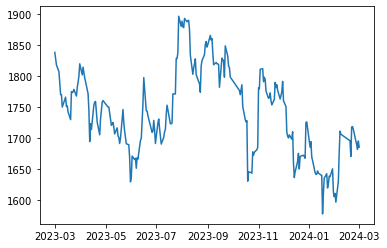

In [53]:
import akshare as ak
# 读入中国平安 「000001」 2022-06-01 到 2022-12-01 日收盘价数据
df = ak.stock_zh_a_hist(symbol="600519", period="daily", start_date="20230301", end_date='20240301', adjust="")
print(df)
plt.plot(df['日期'], df['收盘'])
plt.show()

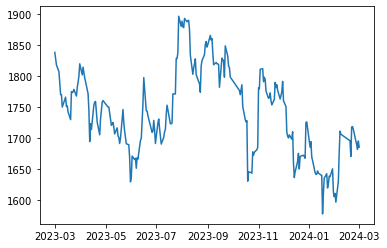

            下周期策略涨跌幅        净值
日期                            
2023-03-01  0.000000  1.000000
2023-03-02  0.000000  1.000000
2023-03-03  0.000000  1.000000
2023-03-06  0.000000  1.000000
2023-03-07  0.000000  1.000000
2023-03-08  0.000000  1.000000
2023-03-09  0.000000  1.000000
2023-03-10  0.000000  1.000000
2023-03-13  0.000000  1.000000
2023-03-14  0.000000  1.000000
2023-03-15  0.000000  1.000000
2023-03-16  0.000000  1.000000
2023-03-17  0.000000  1.000000
2023-03-20  0.000000  1.000000
2023-03-21  0.000000  1.000000
2023-03-22  0.000650  1.000650
2023-03-23  0.000000  1.000650
2023-03-24  0.000000  1.000650
2023-03-27  0.000000  1.000650
2023-03-28  0.000000  1.000650
2023-03-29  0.004349  1.005002
2023-03-30  0.000000  1.005002
2023-03-31  0.000000  1.005002
2023-04-03  0.000000  1.005002
2023-04-04  0.000000  1.005002
2023-04-06  0.000000  1.005002
2023-04-07  0.000000  1.005002
2023-04-10  0.000000  1.005002
2023-04-11  0.000000  1.005002
2023-04-12  0.029157  1.034305
2023-04-

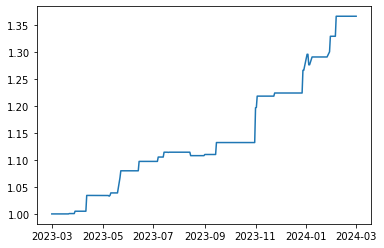

In [59]:
import akshare as ak
# 读入中国平安 「000001」 2022-06-01 到 2022-12-01 日收盘价数据
df = ak.stock_zh_a_hist(symbol="600519", period="daily", start_date="20230301", end_date='20240301', adjust="")
plt.plot(df['日期'], df['收盘'])
plt.show()
df['涨跌幅'] = df['涨跌幅']/100

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('expand_frame_repr', False)  # 当列太多时不换行
pd.set_option('display.max_rows', 5000)  # 最多显示数据的行数

# 回测参数
leverage = 1  # 杠杆比例
period = '24H'  # 周期
c_rate = 2.5 / 10000  # 手续费

# 动量
df['Momentum_20D'] = df['收盘'].pct_change(periods=15)
# 定义买入卖出信号
df['Signal'] = 0  # 初始化信号列
df.loc[df['Momentum_20D'] > 0, 'Signal'] = 1
df.loc[df['Momentum_20D'] < 0, 'Signal'] = -1
# 可以通过计算Signal列的变化来生成实际的交易信号
df['Trade_Signal'] = df['Signal'].diff()
df['Trade_Signal'] = df['Trade_Signal'] / abs(df['Trade_Signal'])

# 计算下周期收益
df['涨跌幅'] = df['涨跌幅'] * df['Trade_Signal'] * leverage - abs(df['Trade_Signal']) * (leverage * c_rate * (1+df['涨跌幅'])) # 杠杆，多空，并且扣除手续费
select_coin = pd.DataFrame()
select_coin['下周期策略涨跌幅'] = df.groupby('日期')['涨跌幅'].sum()
select_coin['净值'] = (select_coin['下周期策略涨跌幅'] + 1).cumprod()
print(select_coin)

# 画图
select_coin.reset_index(inplace=True)
plt.plot(select_coin['日期'], select_coin['净值'])
plt.show()


In [58]:
df['Momentum_20D']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15    -0.035452
16    -0.029070
17    -0.021683
18    -0.021775
19    -0.003635
20     0.011060
21     0.016938
22     0.040000
23     0.022741
24     0.027514
25     0.026295
26     0.022260
27     0.017049
28     0.009193
29    -0.045577
30    -0.028393
31    -0.034617
32    -0.014404
33    -0.005538
34    -0.012796
35    -0.026883
36    -0.041406
37    -0.063187
38    -0.039782
39    -0.038951
40    -0.021726
41    -0.017013
42    -0.012305
43     0.002578
44     0.015595
45    -0.000580
46     0.006758
47    -0.020496
48    -0.029352
49    -0.024275
50    -0.022154
51    -0.014182
52    -0.008211
53    -0.017846
54     0.001198
55    -0.018983
56    -0.028185
57    -0.027944
58    -0.033966
59    -0.018320
60    -0.031190
61    -0.055710
62    -0

最终收益率在一年内可以达到36%，证明动量的有效性。